# 1. Desafio e Dataset
<br>
- O diretor de uma grande empresa de Cartão de Crédito percebeu que o número de clientes que cancelam seus cartões tem aumentado significativamente, causando prejuízos enormes para a empresa.
<br>
<br>
Nosso objetivo é descobrir o motivo de os clientes cancelarem o cartão. Analisaremos o dataset fornecido para tentar descobrir quais pessoas têm maior tendência de solicitar o cancelamento do cartão e o que fazer para evitar que isso aconteça.
<br>
<br>
- Referência: Tanto o problema apresentado quanto o dataset utilizado foram retirados do site Kaggle (https://www.kaggle.com/sakshigoyal7/credit-card-customers)

# 2. Tratando o dataset

In [14]:
# Importando o dataset
import pandas as pd

dataset_original = pd.read_csv('BankChurners.csv')
display(dataset_original)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

- Observando as colunas, de início percebemos que a coluna "CLIENTNUM" exibe apenas o código de representação de cada cliente. Logo, não será necessária para a análise e será excluida.
<br>
<br>
<br>
- Outras colunas que podemos excluir de início são as colunas "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1" e "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2". <br><br> A exclusão dessas colunas é uma recomendação do autor do desafio, pois não fornecem nenhuma informação relevante para a análise.

In [15]:
# Excluindo as colunas
dataset_colunas_excluidas = dataset_original.drop(["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis=1)
display(dataset_colunas_excluidas)

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

- dados faltantes

- As colunas restantes são colunas que fornecem informações diversas sobre os clientes. Uma vez que todas elas podem ter algum tipo de influência sobre a decisão de permanencia ou não como cliente do banco, não excluiremos mais nenhuma coluna.

# 3. Realizando análises no dataset tratado

- Agora que tratamos o dataset, iremos realizar uma análise exploratória para conhecer melhor os dados, tentar encontrar algum padrão no comportamento deles e retirar alguma conclusão que nos aproxime da resposta para o problema proposto. Para realizar nossa análise exploratória, utilizaremos histogramas criados a partir do nosso dataset. Para facilitar o acompanhamento, vamos traduzir os nomes das colunas.

In [16]:
# Tradução das colunas
df_traducao = pd.read_excel('TraducaoColunas.xlsx')
display(df_traducao)
colunas_originais = list(dataset_colunas_excluidas.columns)
colunas_traduzidas = list(df_traducao['Tradução'])
dic_traducao = dict(zip(colunas_originais, colunas_traduzidas))
dataset_colunas_excluidas = dataset_colunas_excluidas.rename(columns = dic_traducao)
display(dataset_colunas_excluidas)

Original                       Tradução
0             Attrition_Flag                 Status_Cliente
1               Customer_Age                          Idade
2                     Gender                           Sexo
3            Dependent_count                    Dependentes
4            Education_Level                       Educação
5             Marital_Status                   Estado_Civil
6            Income_Category           Faixa_Salarial_Anual
7              Card_Category               Categoria_Cartão
8             Months_on_book             Meses_como_Cliente
9   Total_Relationship_Count           Produtos_Contratados
10    Months_Inactive_12_mon                Inatividade_12m
11     Contacts_Count_12_mon                   Contatos_12m
12              Credit_Limit                         Limite
13       Total_Revolving_Bal               Limite_Consumido
14           Avg_Open_To_Buy              Limite_Disponível
15      Total_Amt_Chng_Q4_Q1      Mudanças_Transacoes_Q4_Q1
16           Total_Trans_Amt           Valor_Transacoes_12m
17            Total_Trans_Ct            Qtde_Transacoes_12m
18       Total_Ct_Chng_Q4_Q1  Mudança_Qtde_Transações_Q4_Q1
19     Avg_Utilization_Ratio      Taxa_de_Utilização_Cartão

Status_Cliente  Idade Sexo  Dependentes     Educação Estado_Civil  \
0      Existing Customer     45    M            3  High School      Married   
1      Existing Customer     49    F            5     Graduate       Single   
2      Existing Customer     51    M            3     Graduate      Married   
3      Existing Customer     40    F            4  High School      Unknown   
4      Existing Customer     40    M            3   Uneducated      Married   
...                  ...    ...  ...          ...          ...          ...   
10122  Existing Customer     50    M            2     Graduate       Single   
10123  Attrited Customer     41    M            2      Unknown     Divorced   
10124  Attrited Customer     44    F            1  High School      Married   
10125  Attrited Customer     30    M            2     Graduate      Unknown   
10126  Attrited Customer     43    F            2     Graduate      Married   

      Faixa_Salarial_Anual Categoria_Cartão  Meses_como_Cliente  \
0              $60K - $80K             Blue                  39   
1           Less than $40K             Blue                  44   
2             $80K - $120K             Blue                  36   
3           Less than $40K             Blue                  34   
4              $60K - $80K             Blue                  21   
...                    ...              ...                 ...   
10122          $40K - $60K             Blue                  40   
10123          $40K - $60K             Blue                  25   
10124       Less than $40K             Blue                  36   
10125          $40K - $60K             Blue                  36   
10126       Less than $40K           Silver                  25   

       Produtos_Contratados  Inatividade_12m  Contatos_12m   Limite  \
0                         5                1             3  12691.0   
1                         6                1             2   8256.0   
2                         4                1             0   3418.0   
3                         3                4             1   3313.0   
4                         5                1             0   4716.0   
...                     ...              ...           ...      ...   
10122                     3                2             3   4003.0   
10123                     4                2             3   4277.0   
10124                     5                3             4   5409.0   
10125                     4                3             3   5281.0   
10126                     6                2             4  10388.0   

       Limite_Consumido  Limite_Disponível  Mudanças_Transacoes_Q4_Q1  \
0                   777            11914.0                      1.335   
1                   864             7392.0                      1.541   
2                     0             3418.0                      2.594   
3                  2517              796.0                      1.405   
4                     0             4716.0                      2.175   
...                 ...                ...                        ...   
10122              1851             2152.0                      0.703   
10123              2186             2091.0                      0.804   
10124                 0             5409.0                      0.819   
10125                 0             5281.0                      0.535   
10126              1961             8427.0                      0.703   

       Valor_Transacoes_12m  Qtde_Transacoes_12m  \
0                      1144                   42   
1                      1291                   33   
2                      1887                   20   
3                      1171                   20   
4                       816                   28   
...                     ...                  ...   
10122                 15476                  117   
10123                  8764                   69   
10124                 10291                   60   
10125 

In [17]:
dataset_tratado = dataset_colunas_excluidas.copy()
# Análise preliminar
display(dataset_tratado.describe())
display(dataset_tratado.describe(include=['object']))
# Conferindo a quantidade de clientes ativos e cancelados (valores absolutos)
display(dataset_tratado['Status_Cliente'].value_counts())
# Conferindo a quantidade de clientes ativos e cancelados (valores em porcentagem)
display(dataset_tratado['Status_Cliente'].value_counts(normalize=True))

Idade   Dependentes  Meses_como_Cliente  Produtos_Contratados  \
count  10127.000000  10127.000000        10127.000000          10127.000000   
mean      46.325960      2.346203           35.928409              3.812580   
std        8.016814      1.298908            7.986416              1.554408   
min       26.000000      0.000000           13.000000              1.000000   
25%       41.000000      1.000000           31.000000              3.000000   
50%       46.000000      2.000000           36.000000              4.000000   
75%       52.000000      3.000000           40.000000              5.000000   
max       73.000000      5.000000           56.000000              6.000000   

       Inatividade_12m  Contatos_12m        Limite  Limite_Consumido  \
count     10127.000000  10127.000000  10127.000000      10127.000000   
mean          2.341167      2.455317   8631.953698       1162.814061   
std           1.010622      1.106225   9088.776650        814.987335   
min           0.000000      0.000000   1438.300000          0.000000   
25%           2.000000      2.000000   2555.000000        359.000000   
50%           2.000000      2.000000   4549.000000       1276.000000   
75%           3.000000      3.000000  11067.500000       1784.000000   
max           6.000000      6.000000  34516.000000       2517.000000   

       Limite_Disponível  Mudanças_Transacoes_Q4_Q1  Valor_Transacoes_12m  \
count       10127.000000               10127.000000          10127.000000   
mean         7469.139637                   0.759941           4404.086304   
std          9090.685324                   0.219207           3397.129254   
min             3.000000                   0.000000            510.000000   
25%          1324.500000                   0.631000           2155.500000   
50%          3474.000000                   0.736000           3899.000000   
75%          9859.000000                   0.859000           4741.000000   
max         34516.000000                   3.397000          18484.000000   

       Qtde_Transacoes_12m  Mudança_Qtde_Transações_Q4_Q1  \
count         10127.000000                   10127.000000   
mean             64.858695                       0.712222   
std              23.472570                       0.238086   
min              10.000000                       0.000000   
25%              45.000000                       0.582000   
50%              67.000000                       0.702000   
75%              81.000000                       0.818000   
max             139.000000                       3.714000   

       Taxa_de_Utilização_Cartão  
count               10127.000000  
mean                    0.274894  
std                     0.275691  
min                     0.000000  
25%                     0.023000  
50%                     0.176000  
75%                     0.503000  
max                     0.999000

Status_Cliente   Sexo  Educação Estado_Civil Faixa_Salarial_Anual  \
count               10127  10127     10127        10127                10127   
unique                  2      2         7            4                    6   
top     Existing Customer      F  Graduate      Married       Less than $40K   
freq                 8500   5358      3128         4687                 3561   

       Categoria_Cartão  
count             10127  
unique                4  
top                Blue  
freq               9436

Existing Customer    8500
Attrited Customer    1627
Name: Status_Cliente, dtype: int64

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Status_Cliente, dtype: float64

- Acima temos algumas informações gerais acerca da nossa base de clientes. Por meio do método describe obtemos, separadamente, alguns parâmetros das features numéricas e textuais do nosso dataset. Alguns pontos que podem ser importantes para a análise são fornecidos por este método, como por exemplo a média de idade dos clientes, a média da quantidade de produtos que os clientes adquiriram do banco, o intervalo de limite de cartão de crédito que concentra a maior parte dos clientes, o nível de escolaridade mais presente entre os clientes, dentre outros.
<br>
<br>
- Além do método describe, utilizamos o método value_counts para observar como a coluna de Status_Cliente (nosso alvo) está dividida. Com esse método, pudemos observar que, dentre os 10127 clientes presentes no dataset, cerca de 16% deixou o banco.
<br>
<br>
<h5>Lembrando que na coluna 'Status_Cliente', o valor 'Existing Customer' significa cliente com cartão ativo, e o valor 'Attrited Customer' significa cliente que cancelou seu cartão.<h5>

In [18]:
# Gerando os histogramas
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns

for feature in dataset_tratado:
    fig = px.histogram(dataset_tratado, x=feature, color='Status_Cliente', color_discrete_sequence=['#4682B4', '#FF8C00'])            
    fig.show()

- O objetivo dessa análise exploratória é encontrar alguma característica ou algum conjunto de características que formem um perfil dos clientes alvo. Utilizando os conceitos da regra de Pareto, buscaremos encontrar essas características que são comuns entre a maior parte dos clientes que cancelam seu cartão para podermos trabalhar em soluções em cima delas.

# 4. Conclusões
<br>
<br>
- Observando o gráfico da coluna "Categoria Cartão", observamos que os cancelamentos de clientes da categoria blue representam quase que a totalidade dos cancelamentos.
<br>
<br>
- Observando o gráfico da coluna "Contatos", percebemos que a proporção de cancelamentos cresce a medida que mais contatos são realizados, ou seja, quanto mais o cliente entra em contato com o banco, maior a chance de ele cancelar o cartão. -> analizar o motivo do contato
<br>
<br>
- Observando o gráfico da coluna "Limite" (limite do cartão), observamos que a maior concentração de cancelamentos está no intervalo de clientes com limite de até 6.000 reais, com destaque para a taxa de cancelamentos entre clientes com menos de 4.250 reais. Ou seja, clientes com pouco limite disponível tem grandes chances de realizar o cancelamento. Esse comportamento é reforçado pelo gráfico da coluna "Limite Disponível".
<br>
<br>
- Observando o gráfico da coluna "Qtd Transações" (quantidade de transações), percebemos que a maior concentração de clientes que cancelaram o cartão está na faixa de 0-55 transações, mesmo com a maior concetração de clientes totais estar na faixa de 54-130 transações. Ou seja , temos um indicativo muito forte de que a quantidade de transações é uma das caracteristícas principais do perfil de cliente que cancela seu cartão. Esse comportamento é reforçado pelos gráficos das colunas "Valor Transações 12m" (valor das transações realizadas nos últimos 12 meses), pela coluna "Taxa de utilização do cartão" e pela coluna "Limite Consumido". 
<br>
<br>
<br>
<br>


A partir de 60 transações, a taxa de cancelamentos cai drasticamente. Clientes com menos de 60 transações são clientes críticos, com alta probabilidade de realizar cancelamento. 

# 5. Complementando a análise com machine learning

- Buscando validar a análise exploratória e encontrar alguma feature que acrescente na análise do problema, aplicaremos algoritmos de machine learning para tertarmos criar um modelo de previsão para a evasão de clientes.
<br>
<br>
- Ao encontrarmos um modelo de previsão bom o suficiente, analisaremos como cada feature contribuiu dentro do modelo para a obtenção do resultado final e, assim, encontrar quais features são as mais importantes dentro do perfil de cliente que cancela seu cartão.

In [19]:
# Preparando o dataset para os tratamentos necessários para a aplicação de machine learning
dataset_ml = dataset_tratado.copy()
display(dataset_ml.head(10))
display(dataset_ml.info())

Status_Cliente  Idade Sexo  Dependentes     Educação Estado_Civil  \
0  Existing Customer     45    M            3  High School      Married   
1  Existing Customer     49    F            5     Graduate       Single   
2  Existing Customer     51    M            3     Graduate      Married   
3  Existing Customer     40    F            4  High School      Unknown   
4  Existing Customer     40    M            3   Uneducated      Married   
5  Existing Customer     44    M            2     Graduate      Married   
6  Existing Customer     51    M            4      Unknown      Married   
7  Existing Customer     32    M            0  High School      Unknown   
8  Existing Customer     37    M            3   Uneducated       Single   
9  Existing Customer     48    M            2     Graduate       Single   

  Faixa_Salarial_Anual Categoria_Cartão  Meses_como_Cliente  \
0          $60K - $80K             Blue                  39   
1       Less than $40K             Blue                  44   
2         $80K - $120K             Blue                  36   
3       Less than $40K             Blue                  34   
4          $60K - $80K             Blue                  21   
5          $40K - $60K             Blue                  36   
6              $120K +             Gold                  46   
7          $60K - $80K           Silver                  27   
8          $60K - $80K             Blue                  36   
9         $80K - $120K             Blue                  36   

   Produtos_Contratados  Inatividade_12m  Contatos_12m   Limite  \
0                     5                1             3  12691.0   
1                     6                1             2   8256.0   
2                     4                1             0   3418.0   
3                     3                4             1   3313.0   
4                     5                1             0   4716.0   
5                     3                1             2   4010.0   
6                     6                1             3  34516.0   
7                     2                2             2  29081.0   
8                     5                2             0  22352.0   
9                     6                3             3  11656.0   

   Limite_Consumido  Limite_Disponível  Mudanças_Transacoes_Q4_Q1  \
0               777            11914.0                      1.335   
1               864             7392.0                      1.541   
2                 0             3418.0                      2.594   
3              2517              796.0                      1.405   
4                 0             4716.0                      2.175   
5              1247             2763.0                      1.376   
6              2264            32252.0                      1.975   
7              1396            27685.0                      2.204   
8              2517            19835.0                      3.355   
9              1677             9979.0                      1.524   

   Valor_Transacoes_12m  Qtde_Transacoes_12m  Mudança_Qtde_Transações_Q4_Q1  \
0                  1144                   42                          1.625   
1                  1291                   33                          3.714   
2                  1887                   20                          2.333   
3                  1171                   20                          2.333   
4                   816                   28                          2.500   
5                  1088                   24                          0.846   
6                  1330                   31                          0.722   
7                  1538                   36                          0.714   
8                  1350                   24                          1.182   
9                  1441                   32                          0.882   

   Taxa_de_Utilização_Cartão  
0                      0.061  
1                      0.105  
2                      0.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Status_Cliente                 10127 non-null  object 
 1   Idade                          10127 non-null  int64  
 2   Sexo                           10127 non-null  object 
 3   Dependentes                    10127 non-null  int64  
 4   Educação                       10127 non-null  object 
 5   Estado_Civil                   10127 non-null  object 
 6   Faixa_Salarial_Anual           10127 non-null  object 
 7   Categoria_Cartão               10127 non-null  object 
 8   Meses_como_Cliente             10127 non-null  int64  
 9   Produtos_Contratados           10127 non-null  int64  
 10  Inatividade_12m                10127 non-null  int64  
 11  Contatos_12m                   10127 non-null  int64  
 12  Limite                         10127 non-null 

None

# 6. Encoding

- Uma vez que os algoritmos de machine learning que serão utilizados neste projeto não trabalham com variáveis textuais, precisaremos de alguma forma transformar essas variáveis textuais em variáveis numéricas. Esse processo é chamado de Encoding.
<br>
<br>
- Antes de adaptá-las para uma forma numérica, vamos explorar como estão distribuídos os valores dessas colunas para, se necessário, simplificá-las de alguma forma. Se encontrar-mos colunas que possuam um conjunto de valores com quantidade insignificante em relação ao total, poderemos agrupá-las de alguma forma, ou excluí-las, dependendo da sua relevância para a análise.

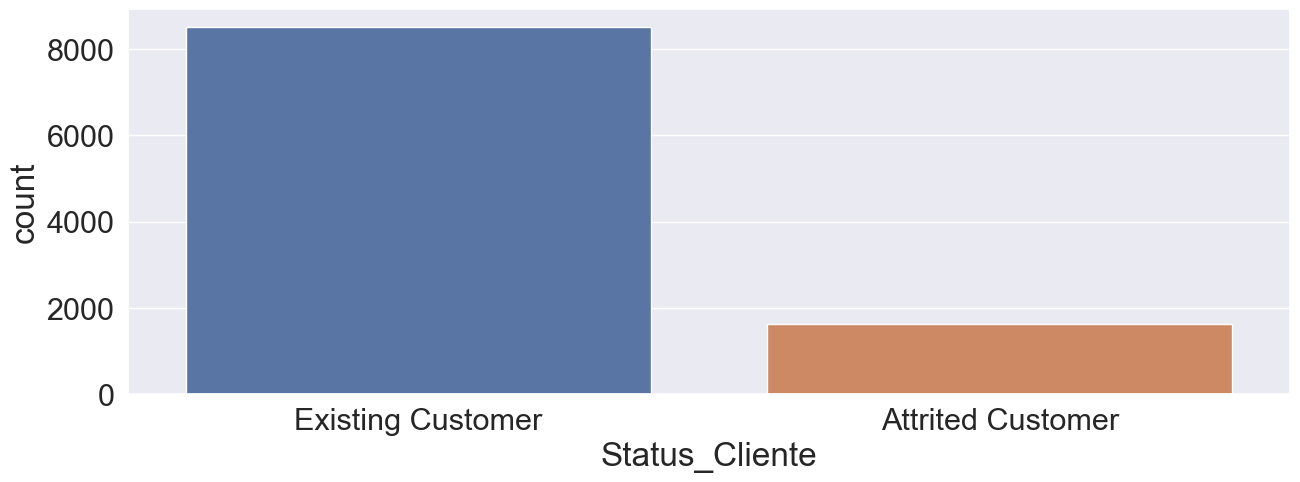

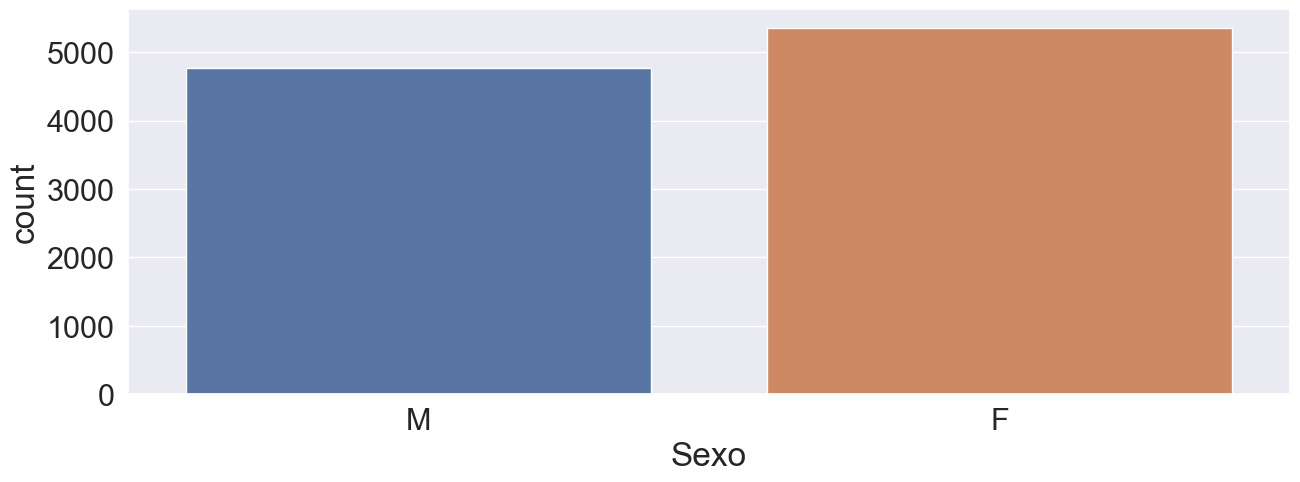

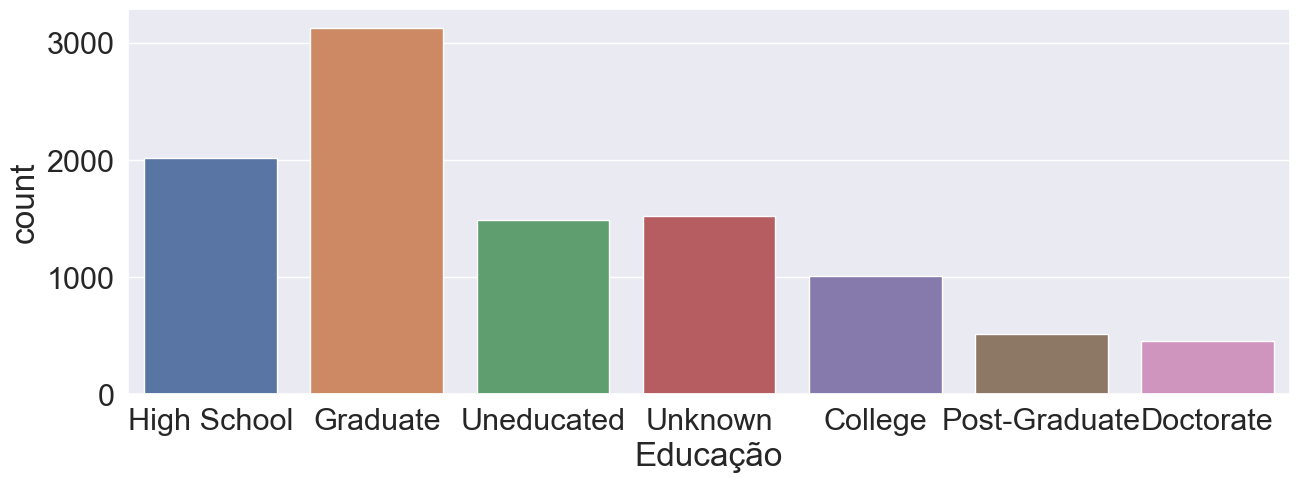

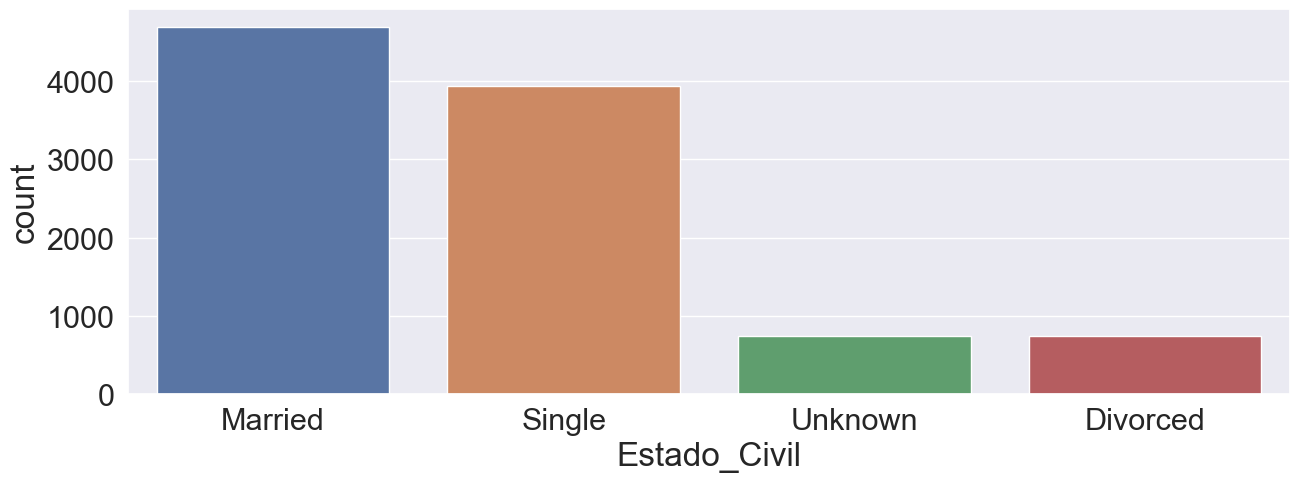

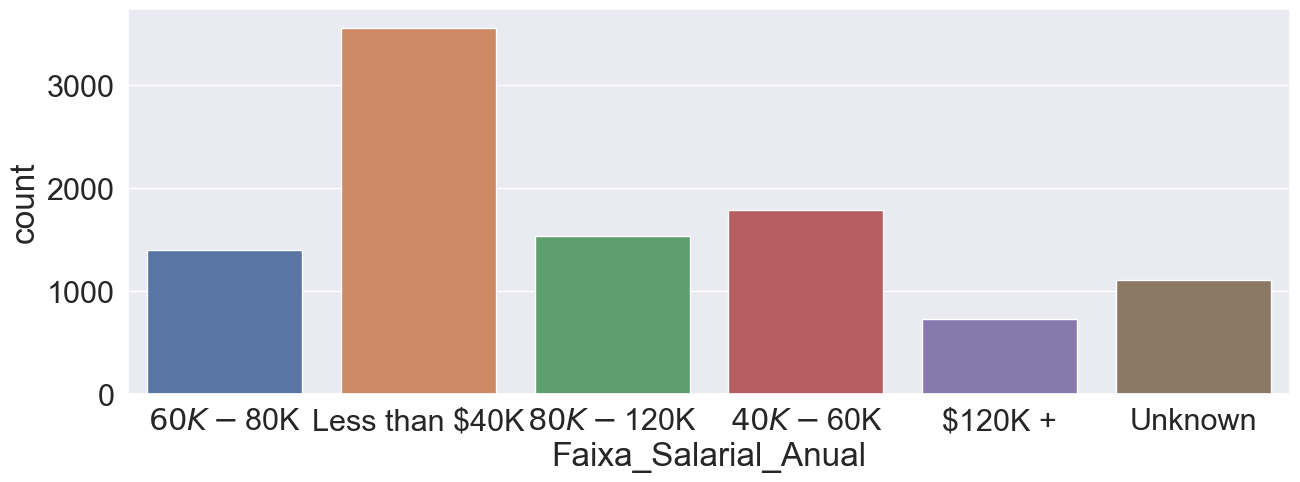

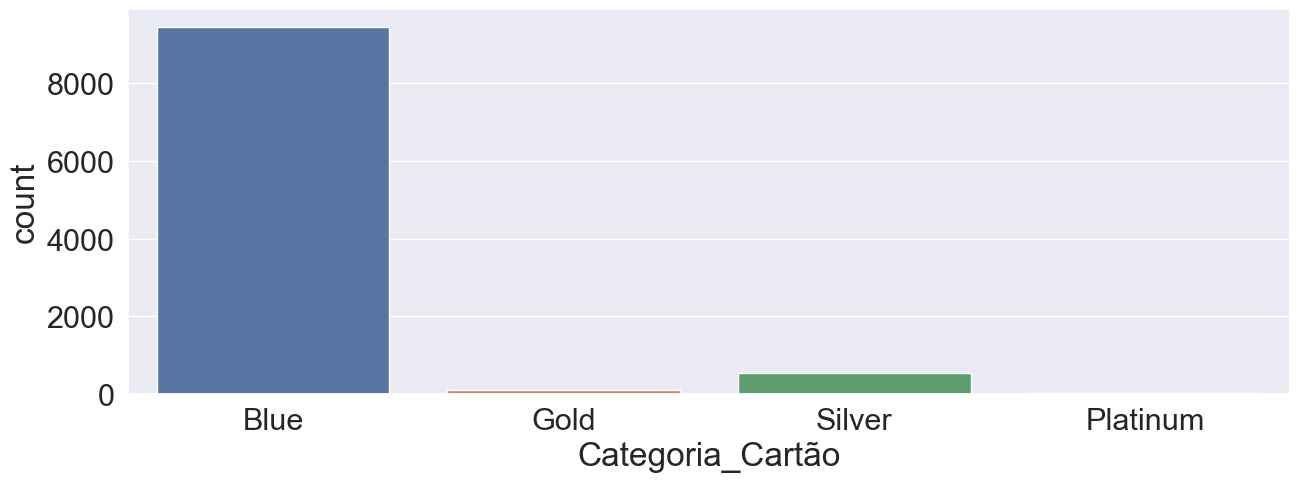

In [20]:
lista_colunas_cat = ['Sexo', 'Educação', 'Estado_Civil', 'Faixa_Salarial_Anual', 'Categoria_Cartão']

plt.figure(figsize=(15, 5))
sns.countplot(x='Status_Cliente', data=dataset_ml)
    
for coluna in lista_colunas_cat:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=coluna, data=dataset_ml)

- Observando os gráficos das colunas, não encontramos valores que se necessitassem de tratamento. Logo, podemos seguir para a conversão dos valores textuais para valores numéricos.
<br>
<br>
- A coluna que abriga os clientes alvo (Status_Cliente) é uma coluna do tipo verdadeiro/falso, no qual o cliente que cancelou seria um valor 'verdadeiro', e o cliente ativo seria um valor 'falso'. Sua convesão para coluna numérica será simples, sendo necessário apenas converter os seus valores para 0 nos valores falsos e 1 nos valores verdadeiros.
<br>
<br>
- Ja para as demais colunas, que são colunas categóricas, aplicaremos a tecnica OneHot Encoding.

In [21]:
dataset_enc = dataset_ml.copy()

# Realizando a conversão da coluna 'Status_Cliente'
dataset_enc.loc[dataset_enc['Status_Cliente'] == 'Attrited Customer', 'Status_Cliente'] = 1
dataset_enc.loc[dataset_enc['Status_Cliente'] == 'Existing Customer', 'Status_Cliente'] = 0

dataset_enc['Status_Cliente'] = dataset_enc['Status_Cliente'].astype(int)

# Conferindo a conversão
dataset_enc.loc[:,'Status_Cliente']

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Status_Cliente, Length: 10127, dtype: int32

In [22]:
# Realizando a conversão das demais colunas
dataset_enc = pd.get_dummies(data=dataset_enc, columns=lista_colunas_cat)

# Conferindo as conversões
display(dataset_enc.info()) # -> vemos que agora todas as colunas são numéricas
display(dataset_enc.iloc[0,:])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Status_Cliente                       10127 non-null  int32  
 1   Idade                                10127 non-null  int64  
 2   Dependentes                          10127 non-null  int64  
 3   Meses_como_Cliente                   10127 non-null  int64  
 4   Produtos_Contratados                 10127 non-null  int64  
 5   Inatividade_12m                      10127 non-null  int64  
 6   Contatos_12m                         10127 non-null  int64  
 7   Limite                               10127 non-null  float64
 8   Limite_Consumido                     10127 non-null  int64  
 9   Limite_Disponível                    10127 non-null  float64
 10  Mudanças_Transacoes_Q4_Q1            10127 non-null  float64
 11  Valor_Transacoes_12m        

None

Status_Cliente                             0.000
Idade                                     45.000
Dependentes                                3.000
Meses_como_Cliente                        39.000
Produtos_Contratados                       5.000
Inatividade_12m                            1.000
Contatos_12m                               3.000
Limite                                 12691.000
Limite_Consumido                         777.000
Limite_Disponível                      11914.000
Mudanças_Transacoes_Q4_Q1                  1.335
Valor_Transacoes_12m                    1144.000
Qtde_Transacoes_12m                       42.000
Mudança_Qtde_Transações_Q4_Q1              1.625
Taxa_de_Utilização_Cartão                  0.061
Sexo_F                                     0.000
Sexo_M                                     1.000
Educação_College                           0.000
Educação_Doctorate                         0.000
Educação_Graduate                          0.000
Educação_High School

# 7. Escolhendo o modelo de machine learning

- Para criar nosso modelo de previsão, escolhemos testar os seguintes modelos: RandomForestClassifier e LogisticRegression.
<br>
<br>
- Após realizar o treinamento dos modelos, escolheremos um deles para trabalhar baseado na análise dos seus parâmetros de desempenho.
<br>
<br>
- Separaremos nosso dataset em dados de treino e dados de teste. Usaremos os dados de treino para treinar os algoritmos escolhidos de machine learning e avaliar os seus desempenhos. O treinamento de cada algoritmo será feito com validação cruzada. Dessa forma, os dados de treino serão separados em varios grupos (folds) de treino e validação, que permitirão aos modelos serem treinados com diferentes grupos de dados, garantido uma maior confiabilidade sobre os parâmetros de desempenho de cada modelo.
<br>
<br>
- Utilizaremos como avaliadores de desempenho os seguintes parâmetro: Acurácia, Precisão, Recall e Matriz de Confusão.

In [23]:
from sklearn.model_selection import train_test_split # Divide os dados em dados de treino e dados de teste
from sklearn.model_selection import cross_val_score, cross_val_predict # realiza a validação cruzada
from sklearn.model_selection import StratifiedKFold # separa os dados em folds com a msm proporção de casos da variavel de interesse
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # modelo de previsão 1
from sklearn.linear_model import LogisticRegression # modelo de previsão 2
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, confusion_matrix

dataset_tratado = dataset_enc.copy()
# Separação das variáveis
y = dataset_tratado['Status_Cliente']
X = dataset_tratado.drop('Status_Cliente', axis=1)

# Semente de aleatoriedade
SEED = 14
np.random.seed(SEED)

# Separação dos dados de teste e dos dados de treino
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

----------------------------------------------------------------
Acurácia média do modelo Random_Forest_Classifier: 95.61%
Intervalo de acurácia do modelo Random_Forest_Classifier: [93.92% ~ 97.29%]


Precisão média do modelo Random_Forest_Classifier: 92.59%
Intervalo de precisão do modelo Random_Forest_Classifier: [90.29% ~ 94.88%]


Recall médio do modelo Random_Forest_Classifier: 77.95%
Intervalo de recall do modelo Random_Forest_Classifier: [74.03% ~ 81.88%]




----------------------------------------------------------------
Acurácia média do modelo Logistic_Regression: 89.54%
Intervalo de acurácia do modelo Logistic_Regression: [87.86% ~ 91.23%]


Precisão média do modelo Logistic_Regression: 74.55%
Intervalo de precisão do modelo Logistic_Regression: [69.71% ~ 79.39%]


Recall médio do modelo Logistic_Regression: 50.51%
Intervalo de recall do modelo Logistic_Regression: [45.73% ~ 55.28%]




----------------------------------------------------------------
Acurácia média do model

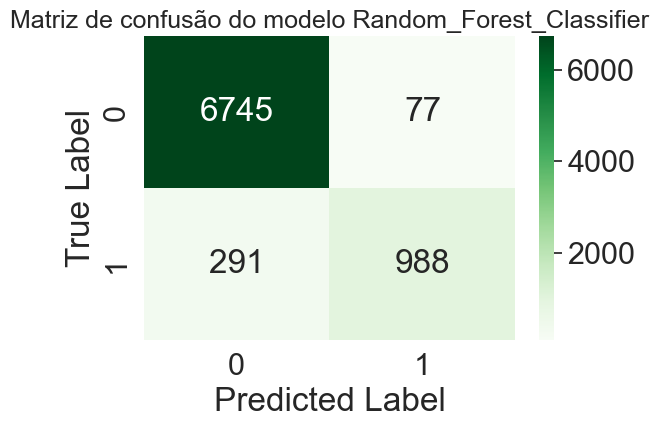

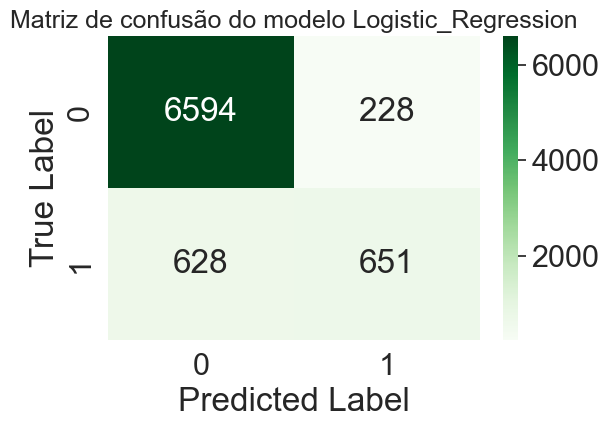

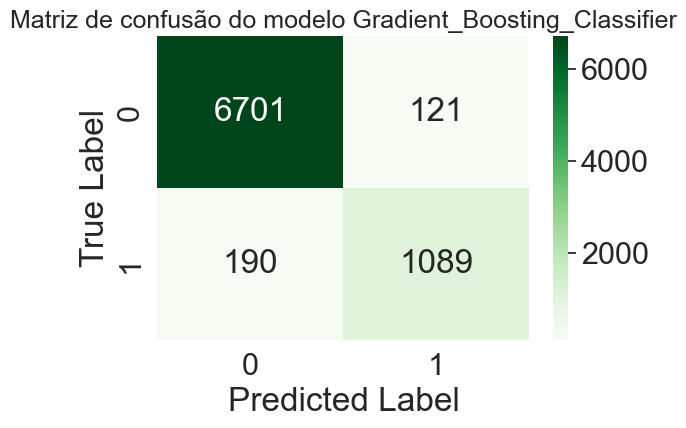

In [24]:
# Preparando os folds
cv = StratifiedKFold(n_splits = 5, shuffle = True)

# Lista de modelos
model_rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model_lr = LogisticRegression(solver='liblinear')
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
models = {
    'Random_Forest_Classifier': model_rfc,
    'Logistic_Regression': model_lr,
    "Gradient_Boosting_Classifier": model_gb
}

# Treinando e avaliando os modelos
for model_name, model in models.items():
    print('----------------------------------------------------------------')
    # Treinando e avaliando a acurácia
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'accuracy')
    mean = results.mean()
    dv = results.std()
    print('Acurácia média do modelo {}: {:.2f}%'.format(model_name, mean*100))
    print('Intervalo de acurácia do modelo {}: [{:.2f}% ~ {:.2f}%]'.format(model_name, (mean - 2*dv)*100, (mean + 2*dv)*100))
    print('\n')

    # Treinando e avaliando a precisão
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'precision')
    mean = results.mean()
    dv = results.std()
    print('Precisão média do modelo {}: {:.2f}%'.format(model_name, mean*100))
    print('Intervalo de precisão do modelo {}: [{:.2f}% ~ {:.2f}%]'.format(model_name, (mean - 2*dv)*100, (mean + 2*dv)*100))
    print('\n')
    
    # Treinando e avaliando o recall
    results = cross_val_score(model, X_train, y_train, cv = cv, scoring = 'recall')
    mean = results.mean()
    dv = results.std()
    print('Recall médio do modelo {}: {:.2f}%'.format(model_name, mean*100))
    print('Intervalo de recall do modelo {}: [{:.2f}% ~ {:.2f}%]'.format(model_name, (mean - 2*dv)*100, (mean + 2*dv)*100))                 
    print('\n')
    
    # Avaliando a matriz de confusão
    predicts = cross_val_predict(model, X_train, y_train, cv = cv)
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_train, predicts), annot=True, ax=ax, fmt='d', cmap='Greens')
    ax.set_title(f"Matriz de confusão do modelo {model_name}", fontsize=18)
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")
    plt.tight_layout()
    
    print('\n')

- Analisando os parâmetros de desempenho, vemos que o algoritmo GradientBoostingClassifier gerou o modelo de melhor desempenho. Com isso, ele será o utilizado para gerar o modelo para estudo.

# 8. Aplicando o modelo escolhido

Precisão:  0.8902439024390244
Recall:  0.8390804597701149
F1 score:  0.8639053254437871
MC:  [[1642   36]
 [  56  292]]


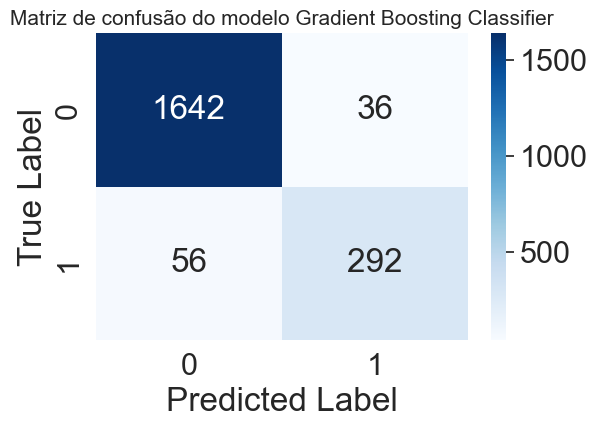

In [25]:
# Criando o modelo
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
gbc.fit(X_train, y_train)
predict = gbc.predict(X_test)

print('Precisão: ', precision_score(y_test, predict))
print('Recall: ', recall_score(y_test, predict))
print('F1 score: ', f1_score(y_test, predict))
print('MC: ', confusion_matrix(y_test, predict))
fig2, ax2 = plt.subplots()
sns.heatmap(confusion_matrix(y_test, predict), annot=True, ax=ax2, fmt='d', cmap='Blues')
ax2.set_title(f"Matriz de confusão do modelo Gradient Boosting Classifier", fontsize=15)
ax2.set_ylabel("True Label")
ax2.set_xlabel("Predicted Label")
plt.tight_layout()

- Após gerar o modelo, podemos analisar o grau de importância de cada feature para o calculo final da previsão. Com isso, saberemos as features mais importantes, veremos se as nossas conclusões durante a análise exploratória foram corretas e poderemos chegar a novas conclusões observando características que podem ter passado desapercebidas durante a análise exploratória.

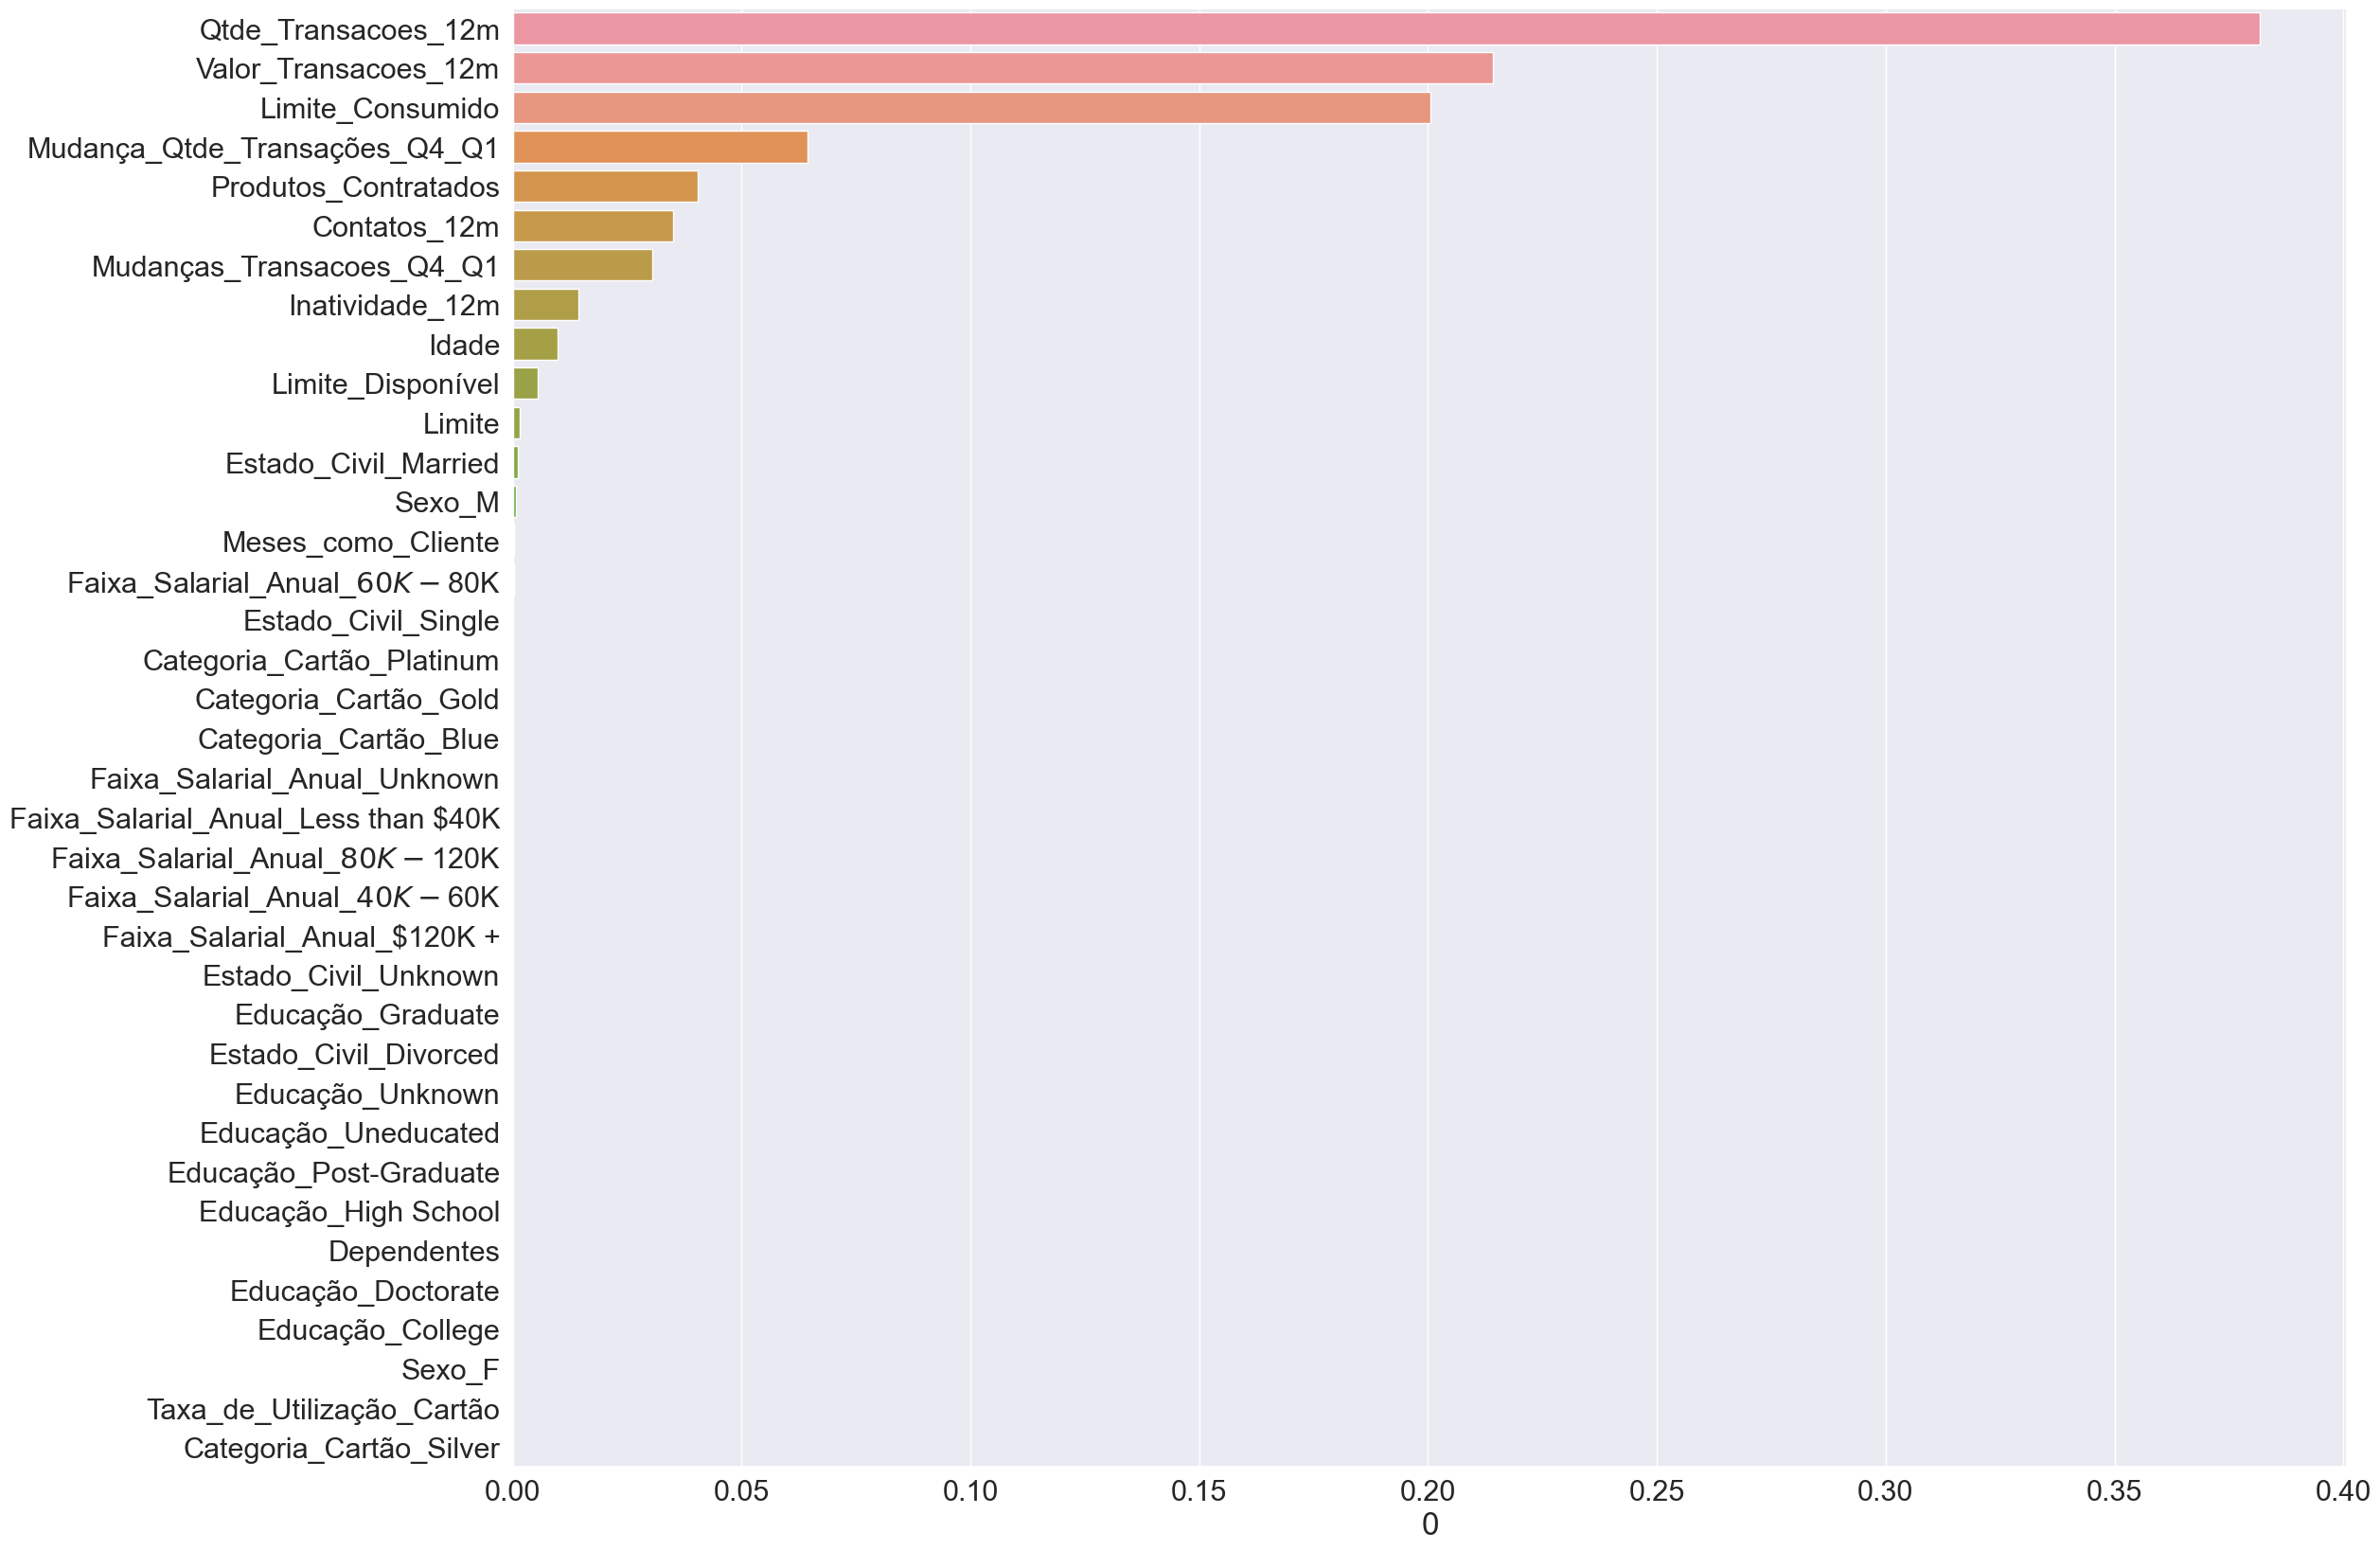

In [26]:
# Gerando o gráfico de importância das colunas
importancia_features = pd.DataFrame(gbc.feature_importances_, X_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(25, 20))
sns.set(font_scale = 2)
ax = sns.barplot(x=importancia_features[0], y=importancia_features.index, orient='h')

# 9. Conclusões da análise com machine learning

- Como podemos ver no gráfico acima, o modelo teve como principais features que influenciaram na decisão do cliente de cancelar o cartão aquelas relacionadas ao volume de transações realizadas pelos clientes, corroborando o que nós já haviamos identificado na análise exploratória. 
<br>
<br>
- Em seguida temos: o limite consumido, a quantidade de produtos contratados, e a quantidade de vezes que o cliente entrou em contato com o banco com significativa influência na decisão do cliente. A quantidade de produtos contratados foi uma característica que não identificamos na análise exploratória, mas que se mostrou significativa para a previsão do modelo.  

# 10. Resultados e soluções propostas

- Baseado nos resultados das análises, temos que o perfil de cliente com maior probabilidade de cancelar o cartão são: aqueles que usam pouco o cartão (principal característica), que possuem poucos produtos do banco e, que quando precisam entrar em contato com o banco, não conseguem resolver o problema nas primeiras ligações.
<br>
<br>
- A partir do perfil encontrado, temos algumas sugestões de ações que podem ser aplicadas para conter o cancelamento dos clientes:
<br>
<br>
 1. Precisamos incentivar o uso do cartão. Desenvolver sistemas de benefícios para quem utiliza o cartão do banco, como por exemplo um programa de pontos, é uma possível solução para esse problema. A grande maioria dos clientes são da categoria de cartão "Blue" (93% do total). Consequentemente, a grande maioria dos clientes que cancelam seus cartões estão nessa categoria. Desenvolver um sistema de benefícios aprimorado para o cartão "Blue" teria grandes chances de reduzir significativamente a evasão dos clientes.
<br>
<br>
 2. Melhorar o serviço de atendimento ao cliente para conseguir-mos resolver o problema do cliente logo nas primeiras vezes que ele entrar em contato. Poderiamos também criar algum sistema de alerta para saber quando algum cliente entrou em contato com o banco mais de uma vez. Ao identificar esse tipo de cliente, o banco poderia priorizar o atendimento dele, conferindo se o seu problema ja foi resolvido e, caso não tenha sido resolvido, entrando em contato com ele para solucionar o problema em questão.
<br>
<br>
 3. Facilitar o acesso aos produtos do banco. Constatamos que quanto mais produtos do banco o cliente tem, menor a chance de ele cancelar o cartão. Aproveitar a aplicação do item 1 e incluir nos benefícios um acesso mais fácil a produtos do banco pode ser uma boa solução, inclusive ajudando a resolver dois problemass de uma vez só. 